In [1]:
import pandas as pd, numpy as np

ride_sharing = pd.read_csv('ride_sharing_new.csv', index_col=0)

In [112]:
ride_sharing.head()

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


### enumerate

In [113]:
tire_sizes = []
for i,j in enumerate(ride_sharing['duration']):
    if i//2==0:
        tire_sizes.append(26)
    else:
        tire_sizes.append(27)      

In [114]:
ride_sharing['tire_sizes']=tire_sizes

In [115]:
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

count     25760
unique        2
top          27
freq      25758
Name: tire_sizes, dtype: int64


# filter with date time

In [66]:
import datetime

d = datetime.date(2019, 4, 13)
print(d)

d.day
d.year
d.month

2019-04-13


4

In [88]:
# Create date and time with dataframe 
n_ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   duration         200 non-null    object        
 1   station_A_id     200 non-null    int64         
 2   station_A_name   200 non-null    object        
 3   station_B_id     200 non-null    int64         
 4   station_B_name   200 non-null    object        
 5   bike_id          200 non-null    int64         
 6   user_type        200 non-null    int64         
 7   user_birth_year  200 non-null    int64         
 8   user_gender      200 non-null    object        
 9   user_type_cat    200 non-null    category      
 10  duration_trim    200 non-null    object        
 11  duration_time    200 non-null    int64         
 12  tire_sizes       200 non-null    category      
 13  ride_dt          200 non-null    datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(6

In [92]:
n_ride_sharing= ride_sharing.iloc[0:200,:]

In [97]:
data = pd.date_range('1/1/2019', periods = 200, freq ='W') 
data = pd.to_datetime(data)
data

DatetimeIndex(['2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10', '2019-02-17', '2019-02-24',
               '2019-03-03', '2019-03-10',
               ...
               '2022-08-28', '2022-09-04', '2022-09-11', '2022-09-18',
               '2022-09-25', '2022-10-02', '2022-10-09', '2022-10-16',
               '2022-10-23', '2022-10-30'],
              dtype='datetime64[ns]', length=200, freq='W-SUN')

In [99]:
# Convert ride_date to datetime
n_ride_sharing['ride_dt'] = data

# Save today's date
today = datetime.date.today()

# Set all in the future to today's date
n_ride_sharing.loc[n_ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(n_ride_sharing['ride_dt'].max())

/Users/knight/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


TypeError: Invalid comparison between dtype=datetime64[ns] and date

# changing the data type

In [9]:
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25760 non-null  object
 1   station_A_id     25760 non-null  int64 
 2   station_A_name   25760 non-null  object
 3   station_B_id     25760 non-null  int64 
 4   station_B_name   25760 non-null  object
 5   bike_id          25760 non-null  int64 
 6   user_type        25760 non-null  int64 
 7   user_birth_year  25760 non-null  int64 
 8   user_gender      25760 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


In [10]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


# Removing the minutes from duration column

In [11]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes') 

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


# Data range constraints
## drop function 
## with index

In [43]:
 df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])
index= ['a', 'b','c']
df.index = index

In [44]:
df

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [41]:
df.drop(df[df['D']>3].index, inplace = True) # drop all the index where value is greater then 3
df

,A,B,C,D
a,0,1,2,3


In [48]:
df[df['D']>3].index

Index(['b', 'c'], dtype='object')

# Finding duplicates


In [15]:
from random import seed
from random import randint
# seed random number generator
seed(1)
# generate some integers
for _ in range(78):
	ride_id = randint(0, 100)

In [18]:
ride_sharing = ride_sharing.iloc[0:77,:]
len(ride_sharing)

77

In [19]:
ride_sharing['ride_id'] = ride_id

In [26]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset = 'ride_id', keep = False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id')

# Print relevant columns
print(duplicated_rides[['ride_id','duration','user_birth_year']])

    ride_id    duration  user_birth_year
0        36  12 minutes             1959
54       36  12 minutes             1999
53       36  14 minutes             1998
52       36  13 minutes             1999
51       36  16 minutes             1987
..      ...         ...              ...
22       36  10 minutes             1982
21       36  11 minutes             1986
20       36  16 minutes             1998
27       36   7 minutes             1977
76       36  18 minutes             1980

[77 rows x 3 columns]


In [30]:
ride_sharing['ride_id'] = pd.to_numeric(ride_sharing['ride_id'])
ride_sharing['user_birth_year'] = pd.to_numeric(ride_sharing['user_birth_year'])

In [31]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes') 

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')


In [32]:
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         77 non-null     object
 1   station_A_id     77 non-null     int64 
 2   station_A_name   77 non-null     object
 3   station_B_id     77 non-null     int64 
 4   station_B_name   77 non-null     object
 5   bike_id          77 non-null     int64 
 6   user_type        77 non-null     int64 
 7   user_birth_year  77 non-null     int64 
 8   user_gender      77 non-null     object
 9   ride_id          77 non-null     int64 
 10  duration_trim    77 non-null     object
 11  duration_time    77 non-null     int64 
dtypes: int64(7), object(5)
memory usage: 7.8+ KB


In [33]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration_time': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

In [9]:
airlines = pd.read_csv('airlines_final.csv',index_col = 0)
airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [4]:
categories= pd.DataFrame({'cleanliness':['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty'],
                'safety': ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe'],
              'satisfaction' : ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']
              })
categories

,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


In [11]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

Empty DataFrame
Columns: [id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []


In [12]:
# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

        id        day        airline        destination    dest_region  \
0     1351    Tuesday    UNITED INTL             KANSAI           Asia   
1      373     Friday         ALASKA  SAN JOSE DEL CABO  Canada/Mexico   
2     2820   Thursday          DELTA        LOS ANGELES        West US   
3     1157    Tuesday      SOUTHWEST        LOS ANGELES        West US   
4     2992  Wednesday       AMERICAN              MIAMI        East US   
...    ...        ...            ...                ...            ...   
2804  1475    Tuesday         ALASKA       NEW YORK-JFK        East US   
2805  2222   Thursday      SOUTHWEST            PHOENIX        West US   
2806  2684     Friday         UNITED            ORLANDO        East US   
2807  2549    Tuesday        JETBLUE         LONG BEACH        West US   
2808  2162   Saturday  CHINA EASTERN            QINGDAO           Asia   

     dest_size boarding_area   dept_time  wait_min     cleanliness  \
0          Hub  Gates 91-102  2018-12-31 

# strip method

In [73]:
txt = "     banana  na   "

print(txt)

     banana  na   


In [74]:
x = txt.strip()

print(x)

banana  na


In [76]:
y = txt.strip(' ')
y

'banana  na'

In [77]:
y = y.strip('na')
y

'banana  '

In [44]:
x = txt.strip(",.grt")

print(x)

     banana  na   


In [42]:
airlines['satisfaction']

0           Very satisfied
1           Very satisfied
2                  Neutral
3       Somewhat satsified
4       Somewhat satsified
               ...        
2804    Somewhat satsified
2805        Very satisfied
2806        Very satisfied
2807        Very satisfied
2808    Somewhat satsified
Name: satisfaction, Length: 2477, dtype: object

In [43]:
airlines['satisfaction'].str.strip('Very')

0                satisfied
1                satisfied
2                  Neutral
3       Somewhat satsified
4       Somewhat satsified
               ...        
2804    Somewhat satsified
2805             satisfied
2806             satisfied
2807             satisfied
2808    Somewhat satsified
Name: satisfaction, Length: 2477, dtype: object

In [50]:
txt = ",,,,,rrttgg.....banana....rrr"

x = txt.strip(",.rtg")

print(x)

banana


# value_counts()

In [78]:
airlines['satisfaction'].value_counts()

Somewhat satsified      1349
Very satisfied           596
Neutral                  486
Somewhat unsatisfied      42
Very unsatisfied           4
Name: satisfaction, dtype: int64

# replace value

In [87]:
mapping = {'Somewhat satsified': 'satisfied',
          'Very satisfied': 'satisfied',
          'Neutral':'Neutral',
          'Somewhat unsatisfied': 'unsatisfied',
          'Very unsatisfied': 'unsatisfied'}
airlines['satisfaction'] = airlines['satisfaction'].replace(mapping)
airlines['satisfaction'].unique()

array(['satisfied', 'Neutral', 'unsatisfied'], dtype=object)

# Inconsistent categories

In [89]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())


['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


In [90]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'])
print(airlines['dest_size'])

0                asia
1       canada/mexico
2             west us
3             west us
4             east us
            ...      
2804          east us
2805          west us
2806          east us
2807          west us
2808             asia
Name: dest_region, Length: 2477, dtype: object
0         Hub
1       Small
2         Hub
3         Hub
4         Hub
        ...  
2804      Hub
2805      Hub
2806      Hub
2807    Small
2808    Large
Name: dest_size, Length: 2477, dtype: object


# Remapping categories

In [97]:
airlines['wait_min']

0       115.0
1       135.0
2        70.0
3       190.0
4       559.0
        ...  
2804    280.0
2805    165.0
2806     92.0
2807     95.0
2808    220.0
Name: wait_min, Length: 2477, dtype: float64

In [95]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)
airlines['wait_type']

0       medium
1       medium
2       medium
3         long
4         long
         ...  
2804      long
2805    medium
2806    medium
2807    medium
2808      long
Name: wait_type, Length: 2477, dtype: category
Categories (3, object): [short < medium < long]

In [96]:
# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)
airlines['day_week']

0       weekday
1       weekday
2       weekday
3       weekday
4       weekday
         ...   
2804    weekday
2805    weekday
2806    weekday
2807    weekday
2808    weekend
Name: day_week, Length: 2477, dtype: object

- str.contains()
- str.len()
- str.strip()
- str.replace()
- .any()

In [100]:
# Store length of each row in survey_response column
resp_length = airlines['satisfaction'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 4]

In [105]:
resp_length

0       9
1       9
2       7
3       9
4       9
       ..
2804    9
2805    9
2806    9
2807    9
2808    9
Name: satisfaction, Length: 2477, dtype: int64

# Uniformity

In [106]:
seattle_weather = pd.DataFrame({'months':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                               'temp' :[4.81,3.31,3.51,2.77,2.16,1.63,0.79,0.97,1.52,3.41,5.84,5.43]})
seattle_weather

,months,temp
0,Jan,4.81
1,Feb,3.31
2,Mar,3.51
3,Apr,2.77
4,May,2.16
5,Jun,1.63
6,Jul,0.79
7,Aug,0.97
8,Sep,1.52
9,Oct,3.41


In [108]:
ch_temp = seattle_weather.loc[seattle_weather['temp'] >3 , 'temp']
ch_temp

0     4.81
1     3.31
2     3.51
9     3.41
10    5.84
11    5.43
Name: temp, dtype: float64

In [109]:
new_temp = 4
seattle_weather.loc[seattle_weather['temp'] >3 , 'temp'] = new_temp

In [114]:
assert seattle_weather['temp'].max() < 5

In [112]:
seattle_weather['temp']

0     4.00
1     4.00
2     4.00
3     2.77
4     2.16
5     1.63
6     0.79
7     0.97
8     1.52
9     4.00
10    4.00
11    4.00
Name: temp, dtype: float64

In [137]:
banking = pd.read_csv('banking_dirty.csv', index_col = 0)
banking.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [135]:
import random
list1 = ['euro','dollar']  
  
for x in range(5): 
    print(random.choice(list1)) 

euro
euro
dollar
dollar
euro


In [138]:
banking['acct_cur'] = [random.choice(list1) for x in range(100)]

In [139]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1 

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

In [141]:
banking['acct_cur'].unique()

array(['dollar'], dtype=object)

# Uniform dates

In [143]:
# Print the header of account_opend
print(banking['account_opened'].head())


0   2018-02-09
1   2019-02-28
2   2018-04-25
3   2017-07-11
4   2018-05-14
Name: account_opened, dtype: datetime64[ns]


In [144]:
# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

In [145]:
# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


# Cross field validation

In [147]:
flights = pd.read_csv('airlines_final.csv', index_col = 0) 
flights.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [152]:
sum_classes = flights[[]]

fl = pd.DataFrame({'flight_number':[ 'DL140','BA248','MEA124', 'AFR939','TKA101'],
     'economy_class': [100,130,100,140,130],
     'business_class':[60,100,50,70,100],
     'first_class':[4,70,50,9,20],
     'total_passangers':[200,300,200,300,250]})
fl

,flight_number,economy_class,business_class,first_class,total_passangers
0,DL140,100,60,4,200
1,BA248,130,100,70,300
2,MEA124,100,50,50,200
3,AFR939,140,70,9,300
4,TKA101,130,100,20,250


In [153]:
sum_classes = fl[['economy_class','business_class','first_class' ]].sum(axis =1)

passanger_equ = sum_classes == fl['total_passangers']
passanger_equ


0    False
1     True
2     True
3    False
4     True
dtype: bool

In [154]:
sum_classes

0    164
1    300
2    200
3    219
4    250
dtype: int64

In [157]:
#find and filter out rows with inconsistent passangers
inconsistent_pass = fl[~passanger_equ]
inconsistent_pass

,flight_number,economy_class,business_class,first_class,total_passangers
0,DL140,100,60,4,200
3,AFR939,140,70,9,300


In [158]:
consistent_pass = fl[passanger_equ]
consistent_pass

,flight_number,economy_class,business_class,first_class,total_passangers
1,BA248,130,100,70,300
2,MEA124,100,50,50,200
4,TKA101,130,100,20,250


In [161]:
banking.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_cur,acct_year
0,870A9281,1962-06-09,58,63523.310,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,22-02-19,dollar,2018
1,166B05B0,1962-12-16,58,38175.460,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,31-10-18,dollar,2019
2,BFC13E88,1990-09-12,34,65850.147,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,02-04-18,dollar,2018
3,F2158F66,1985-11-03,35,92545.310,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,08-11-18,dollar,2017
4,7A73F334,1990-05-17,30,120512.000,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,19-07-18,dollar,2018


In [164]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis = 1) == banking['inv_amount']

In [162]:
inv_equ

0      True
1      True
2      True
3      True
4     False
      ...  
95     True
96     True
97     True
98     True
99     True
Length: 100, dtype: bool

In [163]:
# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [166]:
banking.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_cur,acct_year
0,870A9281,1962-06-09,58,63523.310,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,22-02-19,dollar,2018
1,166B05B0,1962-12-16,58,38175.460,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,31-10-18,dollar,2019
2,BFC13E88,1990-09-12,34,65850.147,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,02-04-18,dollar,2018
3,F2158F66,1985-11-03,35,92545.310,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,08-11-18,dollar,2017
4,7A73F334,1990-05-17,30,120512.000,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,19-07-18,dollar,2018


In [180]:
banking['birth_date'] = pd.to_datetime(banking['birth_date'])

In [183]:
# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking['Age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  8


In [185]:
ages_manual

0     58
1     58
2     30
3     35
4     30
      ..
95    46
96    31
97    36
98    51
99    27
Name: birth_date, Length: 100, dtype: int64

# Completeness

In [186]:
airquality = pd.read_csv('air-quality.csv')
airquality.head()

,Date,Ozone,Solar,Wind,Temp
0,1976-05-01,41.0,190.0,7.4,67
1,1976-05-02,36.0,118.0,8.0,72
2,1976-05-03,12.0,149.0,12.6,74
3,1976-05-04,18.0,313.0,11.5,62
4,1976-05-05,NaN,NaN,14.3,56


In [187]:
airquality.isna()

,Date,Ozone,Solar,Wind,Temp
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,True,True,False,False
...,...,...,...,...,...
148,False,False,False,False,False
149,False,True,False,False,False
150,False,False,False,False,False
151,False,False,False,False,False


In [188]:
airquality.isna().sum()

Date      0
Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

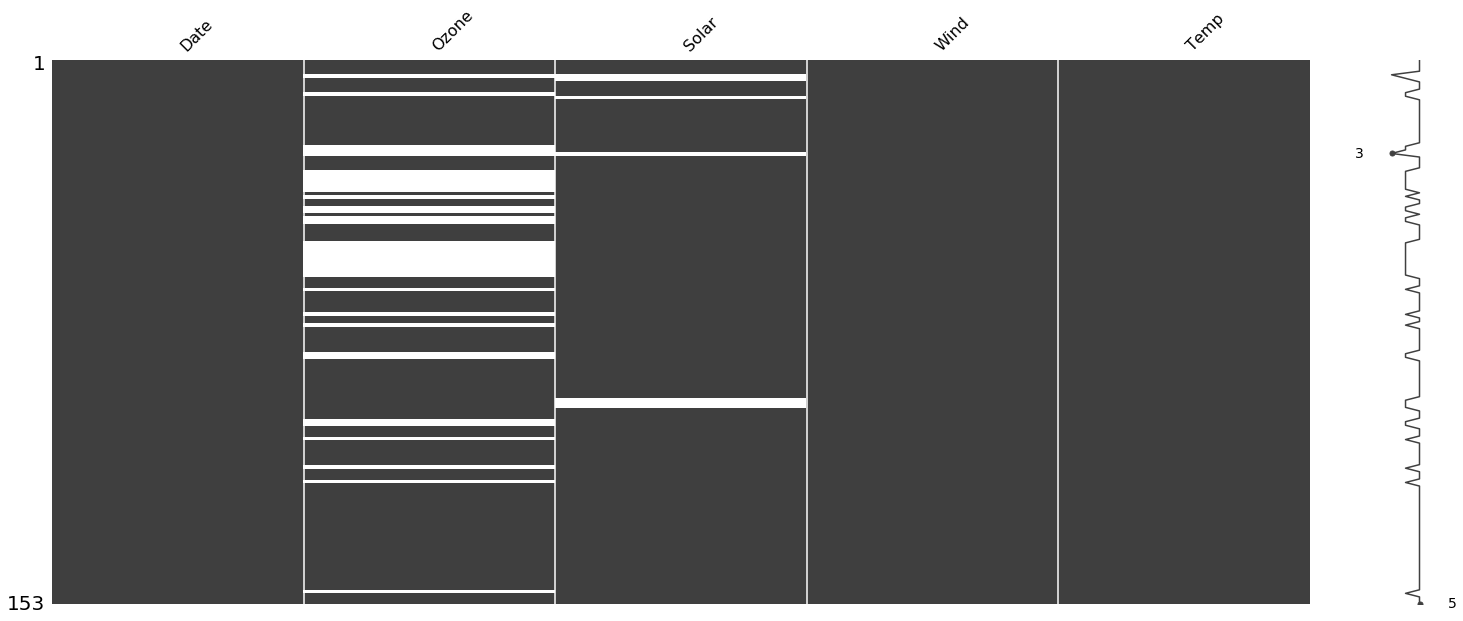

In [193]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(airquality)
plt.show()

In [194]:
#isolate missing and complete values
missing = airquality[airquality['Ozone'].isna()]
complete = airquality[~airquality['Ozone'].isna()]

In [195]:
missing.describe()

,Ozone,Solar,Wind,Temp
count,0.0,35.000000,37.000000,37.000000
mean,NaN,189.514286,10.256757,77.918919
std,NaN,87.694782,3.385142,9.531755
min,NaN,31.000000,1.700000,56.000000
25%,NaN,131.000000,8.000000,75.000000
50%,NaN,194.000000,9.700000,79.000000
75%,NaN,261.500000,12.600000,84.000000
max,NaN,332.000000,16.600000,93.000000


In [196]:
complete.describe()

,Ozone,Solar,Wind,Temp
count,116.000000,111.000000,116.000000,116.000000
mean,42.129310,184.801802,9.862069,77.870690
std,32.987885,91.152302,3.574856,9.485486
min,1.000000,7.000000,2.300000,57.000000
25%,18.000000,113.500000,7.400000,71.000000
50%,31.500000,207.000000,9.700000,79.000000
75%,63.250000,255.500000,11.500000,85.000000
max,168.000000,334.000000,20.700000,97.000000


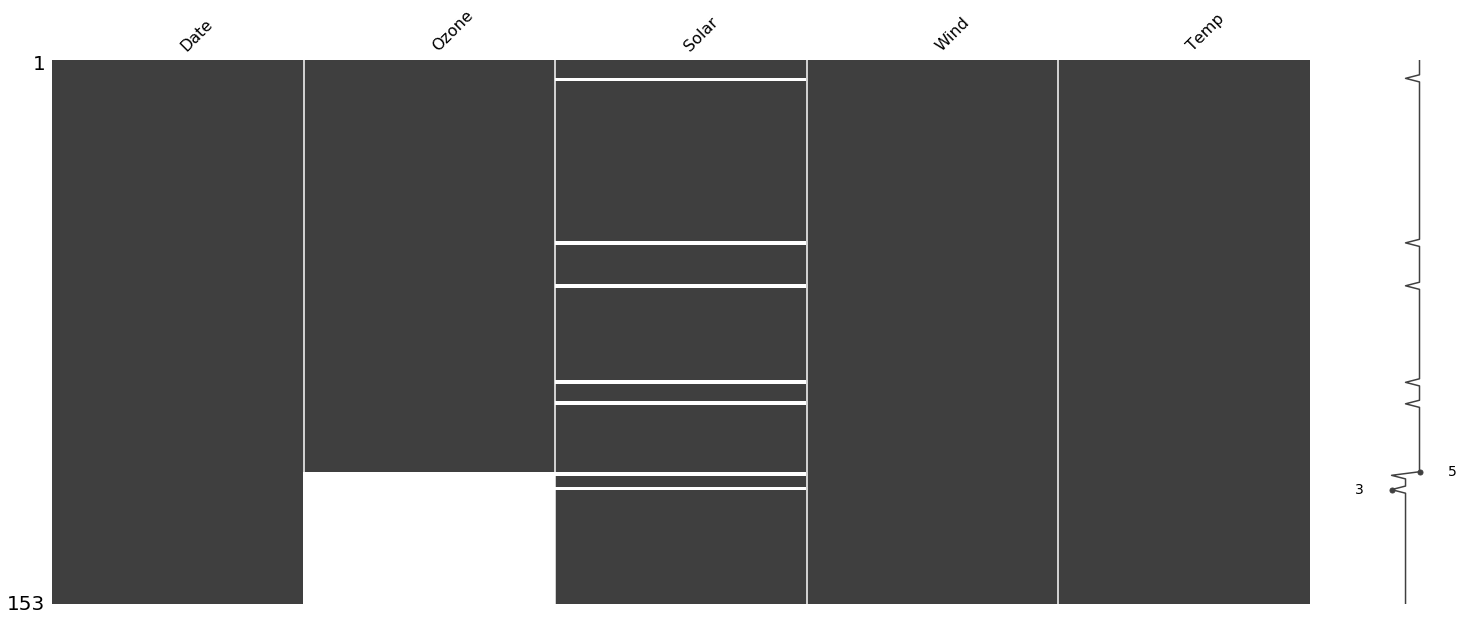

In [197]:
sorted_airquality = airquality.sort_values(by = 'Ozone')
msno.matrix(sorted_airquality)
plt.show()

In [198]:
Ozone_mean = airquality["Ozone"].mean()

airquality_imputed = airquality.fillna({'Ozone':Ozone_mean})
airquality_imputed.head()

,Date,Ozone,Solar,Wind,Temp
0,1976-05-01,41.00000,190.0,7.4,67
1,1976-05-02,36.00000,118.0,8.0,72
2,1976-05-03,12.00000,149.0,12.6,74
3,1976-05-04,18.00000,313.0,11.5,62
4,1976-05-05,42.12931,NaN,14.3,56


cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_cur            0
acct_year           0
dtype: int64


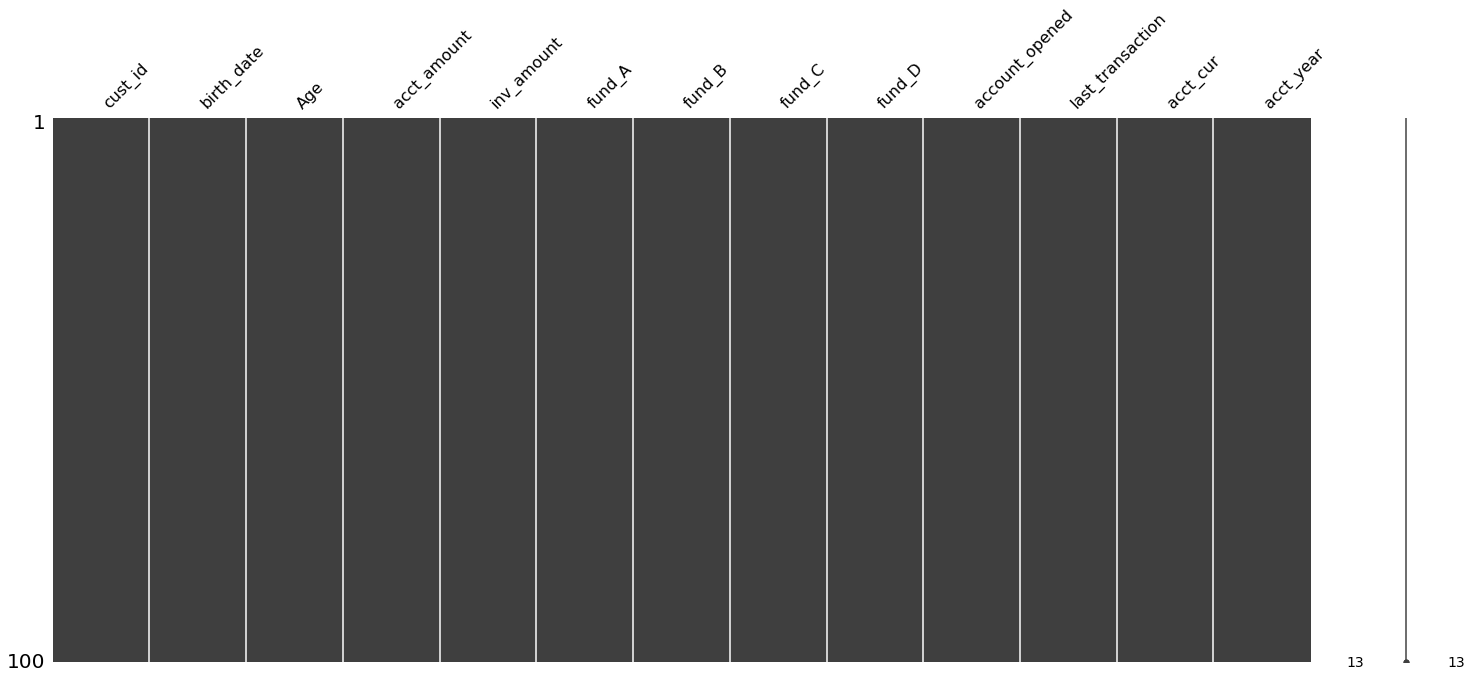

In [199]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_cur            0
acct_year           0
dtype: int64


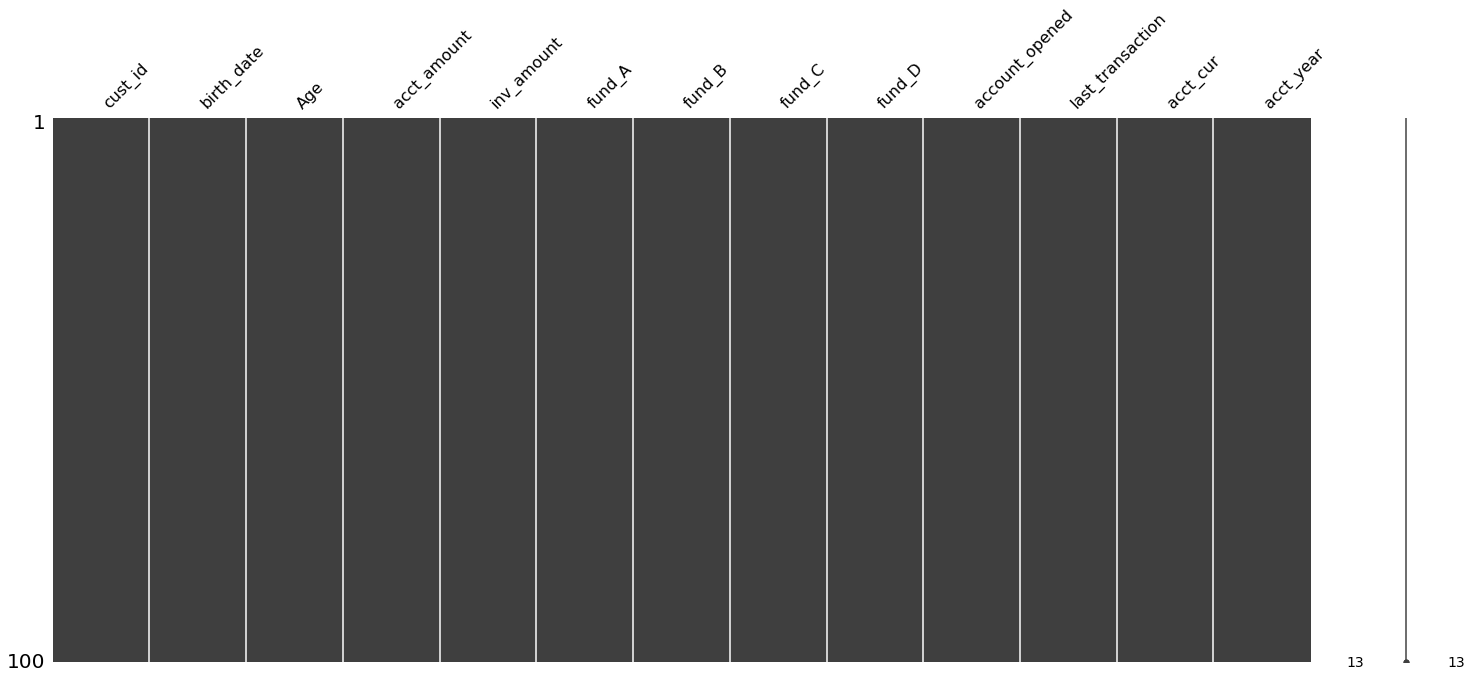

In [203]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

In [204]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]


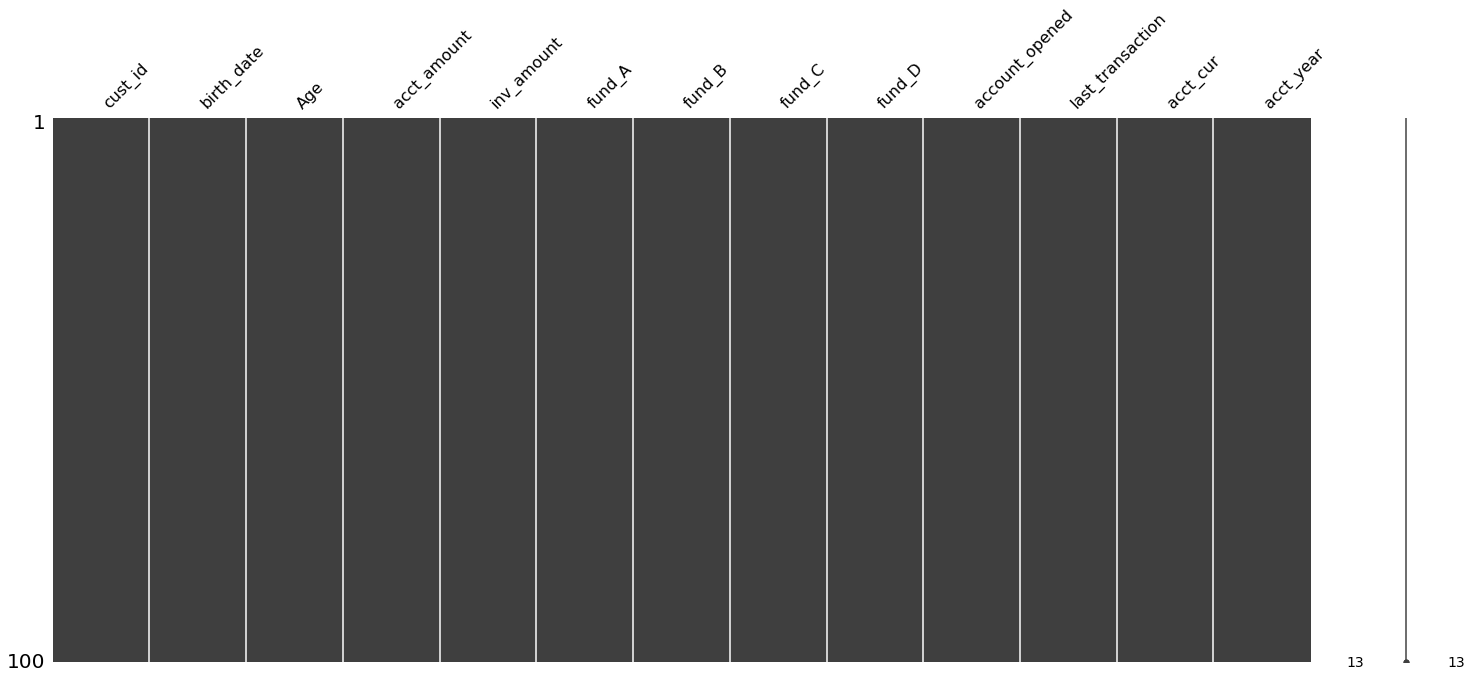

In [202]:

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by = 'Age')
msno.matrix(banking_sorted)

plt.show()

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing cust_id don't really help you, and that on average acct_amount is usually 5 times the amount of inv_amount.

In [208]:
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5


In [209]:
acct_imp

0     256475
1      75250
2     122835
3     118560
4     466150
       ...  
95     37575
96    245445
97    139810
98    148310
99    160745
Name: inv_amount, Length: 100, dtype: int64

In [207]:
banking_fullid

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_cur,acct_year
0,870A9281,1962-06-09,58,63523.310,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,22-02-19,dollar,2018
1,166B05B0,1962-12-16,58,38175.460,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,31-10-18,dollar,2019
2,BFC13E88,1990-09-12,34,65850.147,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,02-04-18,dollar,2018
3,F2158F66,1985-11-03,35,92545.310,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,08-11-18,dollar,2017
4,7A73F334,1990-05-17,30,120512.000,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,19-07-18,dollar,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CA507BA1,1974-08-10,46,12209.840,7515,190.0,931.0,1451.0,4943.0,2018-05-26,11-09-19,dollar,2018
96,B99CD662,1989-12-12,31,92838.440,49089,2453.0,7892.0,31486.0,7258.0,2017-04-05,12-03-19,dollar,2017
97,13770971,1984-11-29,36,102025.957,27962,3352.0,7547.0,8486.0,8577.0,2017-08-16,24-04-19,dollar,2017
98,93E78DA3,1969-12-14,51,41942.230,29662,1758.0,11174.0,11650.0,5080.0,2017-09-10,15-04-18,dollar,2017


In [210]:
# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_cur            0
acct_year           0
dtype: int64


In [211]:
banking_imputed.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_cur,acct_year
0,870A9281,1962-06-09,58,63523.310,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,22-02-19,dollar,2018
1,166B05B0,1962-12-16,58,38175.460,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,31-10-18,dollar,2019
2,BFC13E88,1990-09-12,34,65850.147,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,02-04-18,dollar,2018
3,F2158F66,1985-11-03,35,92545.310,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,08-11-18,dollar,2017
4,7A73F334,1990-05-17,30,120512.000,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,19-07-18,dollar,2018


In [218]:
banking_imputed['Age'][0]

58

In [213]:
txt = 'europe'

r = txt.replace('euro','Euro')
r

'Europe'

In [214]:
0.030160/(0.046928*0.049821)

12.899915074760688